# **df1 - Preprocessing**

# **Insurance Risk & Claims Dataset**

# **1) Missing Values**

In [1]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/Captsone project/Data/df1-synthetic_insurance_dataset_fixed.csv')
df1.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score,Fraudulent_Claim
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,Male,Health,153479.09,7,1,1127.92,5124.76,Low,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,Other,Health,126288.65,1,0,921.63,11633.04,Low,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,Male,Auto,148883.53,22,4,2387.84,22460.45,Medium,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,Male,Auto,145665.09,10,2,1199.66,47860.65,Medium,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,Male,Health,88386.91,11,2,3216.77,40356.41,High,1


In [2]:
df1.isnull().sum()

,0
Policy_ID,0
Customer_Age,0
Gender,0
Policy_Type,0
Annual_Income,0
Vehicle_Age_Property_Age,0
Claim_History,0
Premium_Amount,0
Claim_Amount,0
Risk_Score,0


# **If Missing Values have this Datasets.**

# **Step 1:**

check % of Missing Values if more than 70% Missing Values -> Delete that Columns

# **Step 2:**

Check this Columns have Normal Distribution and No Outliers - Use Mean Imputation

Else use Median Imputation

# **Step 3:**

Check that Columns Have Categorical Columns Use Mode

# **Step 4:**

If That Dataset have Times series Use Forward fill or Backward Fill

#**Step 5:**

If that Missing Values was Voluntarily Happen Based On Confidential else any other Situation

Client or SME or BA Give us Custom values fill us Cutom method to fill Missing Values

# **2) Outliers**

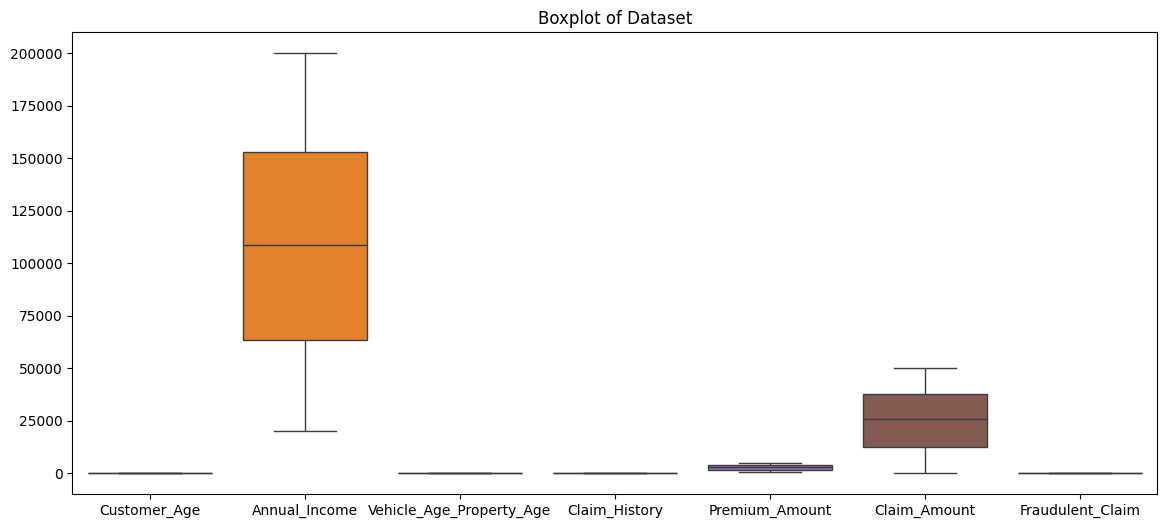

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1)
plt.title("Boxplot of Dataset")
plt.show()


In [4]:
import pandas as pd

# Detect outliers using IQR for all numeric columns
outliers = {}

for col in df1.select_dtypes(include=['number']).columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col].tolist()

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers in {col}: {out}")


Outliers in Customer_Age: []
Outliers in Annual_Income: []
Outliers in Vehicle_Age_Property_Age: []
Outliers in Claim_History: []
Outliers in Premium_Amount: []
Outliers in Claim_Amount: []
Outliers in Fraudulent_Claim: []


# **If Outlier Found in this Datasets:-**

# **Step 1: Understand the Outliers**



**Check Data Entry Errors:** Typos or incorrect values? Fix them if possible.

**Assess Context:** Are these extreme values realistic or expected in your data domain?

#**Step 2: Choose an Outlier Treatment Approach:**



#**1) Removal Methods:**

**Delete Outliers:** If they’re definitely errors or irrelevant.

df_clean = df1[~((df1['A'] < lower_bound) | (df1['A'] > upper_bound))]


#**2) Imputation Methods:**

**Replace with Mean/Median:** Works well when outliers aren’t extreme.

median = df1['A'].median()
df1['A'] = np.where((df1['A'] < lower_bound) | (df1['A'] > upper_bound), median, df1['A'])

**Use Mode:** For categorical data with outliers


#**3) Transformation Methods:**

**Log Transformation:** Reduces effect of right-skewed outliers.

df1['A_log'] = np.log1p(df1['A'])

**Square Root or Box-Cox:** For data with different types of skew.


#**4) Capping or Clipping**

**Winsorization:** Limit extreme values to percentiles.

from scipy.stats.mstats import winsorize
df1['A_winsorized'] = winsorize(df1['A'], limits=[0.05, 0.05])  # Caps at 5th & 95th percentile

**Cap at Boundaries:** Replace outliers with IQR bounds.

df1['A'] = np.clip(df1['A'], lower_bound, upper_bound)


# **3) Encoding**

# **1) One-Hot Encoding for [Policy_Type, Gender].**

# **2) Label Encoding for [Risk_Score] (Low → 0, Medium → 1, High → 2).**

In [5]:
df1.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score,Fraudulent_Claim
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,Male,Health,153479.09,7,1,1127.92,5124.76,Low,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,Other,Health,126288.65,1,0,921.63,11633.04,Low,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,Male,Auto,148883.53,22,4,2387.84,22460.45,Medium,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,Male,Auto,145665.09,10,2,1199.66,47860.65,Medium,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,Male,Health,88386.91,11,2,3216.77,40356.41,High,1


In [6]:
df1.shape

(1000, 11)

In [7]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder with updated argument
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded = onehot_encoder.fit_transform(df1[['Policy_Type', 'Gender']])

# Convert back to DataFrame for readability and cast to int
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(['Policy_Type', 'Gender'])).astype(int)

print(encoded_df)


     Policy_Type_Auto  Policy_Type_Health  Policy_Type_Life  \
0                   0                   1                 0   
1                   0                   1                 0   
2                   1                   0                 0   
3                   1                   0                 0   
4                   0                   1                 0   
..                ...                 ...               ...   
995                 0                   1                 0   
996                 0                   0                 0   
997                 1                   0                 0   
998                 1                   0                 0   
999                 0                   1                 0   

     Policy_Type_Property  Gender_Female  Gender_Male  Gender_Other  
0                       0              0            1             0  
1                       0              0            0             1  
2                       0        

In [8]:
df1.head(1)

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score,Fraudulent_Claim
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,Male,Health,153479.09,7,1,1127.92,5124.76,Low,0


# **2) Risk_Score -> Ordinal Encoding**

In [9]:
from sklearn.preprocessing import OrdinalEncoder


# Define the order of categories from low to high risk
risk_categories = ['Low', 'Medium', 'High']

# Create the OrdinalEncoder with category order
lbl_encoder = OrdinalEncoder(categories=[risk_categories])

# Fit and transform the Risk_Score column
df1['Risk_Score_Encoded'] = lbl_encoder.fit_transform(df1[['Risk_Score']]).astype(int)

print(df1)


                                Policy_ID  Customer_Age  Gender Policy_Type  \
0    bdd640fb-0667-4ad1-9c80-317fa3b1799d            58    Male      Health   
1    23b8c1e9-3924-46de-beb1-3b9046685257            65   Other      Health   
2    bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56    Male        Auto   
3    972a8469-1641-4f82-8b9d-2434e465e150            35    Male        Auto   
4    17fc695a-07a0-4a6e-8822-e8f36c031199            39    Male      Health   
..                                    ...           ...     ...         ...   
995  fe54ee4b-80ff-4173-a3df-ecd70e731dd7            76  Female      Health   
996  ea98fef8-d0d7-4e37-bbf2-025f4a0d2b73            61  Female    Property   
997  93d563ae-51a3-4c26-937b-f79bbb44badc            35  Female        Auto   
998  d18183d1-ac2b-4cfc-85c5-1060991121e7            30    Male        Auto   
999  e0527739-4d40-4f1b-bca5-be2952171bf3            45   Other      Health   

     Annual_Income  Vehicle_Age_Property_Age  Claim

In [10]:
df1.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score,Fraudulent_Claim,Risk_Score_Encoded
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,Male,Health,153479.09,7,1,1127.92,5124.76,Low,0,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,Other,Health,126288.65,1,0,921.63,11633.04,Low,0,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,Male,Auto,148883.53,22,4,2387.84,22460.45,Medium,0,1
3,972a8469-1641-4f82-8b9d-2434e465e150,35,Male,Auto,145665.09,10,2,1199.66,47860.65,Medium,1,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,Male,Health,88386.91,11,2,3216.77,40356.41,High,1,2


In [11]:
df1_encoded=pd.concat([df1,encoded_df],axis=1)

In [12]:
df1_encoded.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,Male,Health,153479.09,7,1,1127.92,5124.76,Low,0,0,0,1,0,0,0,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,Other,Health,126288.65,1,0,921.63,11633.04,Low,0,0,0,1,0,0,0,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,Male,Auto,148883.53,22,4,2387.84,22460.45,Medium,0,1,1,0,0,0,0,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,Male,Auto,145665.09,10,2,1199.66,47860.65,Medium,1,1,1,0,0,0,0,1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,Male,Health,88386.91,11,2,3216.77,40356.41,High,1,2,0,1,0,0,0,1,0


In [13]:
df1_encoded.drop(columns=['Policy_Type','Gender','Risk_Score'],inplace=True)

In [14]:
df1_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,153479.09,7,1,1127.92,5124.76,0,0,0,1,0,0,0,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,126288.65,1,0,921.63,11633.04,0,0,0,1,0,0,0,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,148883.53,22,4,2387.84,22460.45,0,1,1,0,0,0,0,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,145665.09,10,2,1199.66,47860.65,1,1,1,0,0,0,0,1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,88386.91,11,2,3216.77,40356.41,1,2,0,1,0,0,0,1,0


# **Encoded Completed:**

In [15]:
df1_encoded.nunique()

,0
Policy_ID,1000
Customer_Age,63
Annual_Income,1000
Vehicle_Age_Property_Age,31
Claim_History,6
Premium_Amount,1000
Claim_Amount,999
Fraudulent_Claim,2
Risk_Score_Encoded,3
Policy_Type_Auto,2


# **Save Encoded Files**

# **1) One Hot Encoder:**

In [16]:
import pickle
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

# **2) Label Encoder**

In [17]:
with open('lbl_encoder.pkl', 'wb') as file:
    pickle.dump(lbl_encoder, file)

# **in Nominal or One Hot Encoding Means -> 0 is No and 1 is Yes**

In [18]:
df1_encoded.shape

(1000, 16)

In [19]:
df1_encoded.to_csv('df1_encoded.csv')

# **4) Feature Scaling**

# **Normalize**

# **Annual_Income, Claim_Amount, Premium_Amount**

# Normalize done by reason of minimizing the value for better model training and reduce time - values ranges ( 0 to 1 )

In [20]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Select only the numerical columns to scale
numerical_columns = ['Annual_Income', 'Premium_Amount', 'Claim_Amount']

# Create and fit the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1_encoded[numerical_columns])  # Fit on training data

# Optional: transform and overwrite scaled values in the dataframe
df1_encoded[numerical_columns] = scaler.transform(df1_encoded[numerical_columns])

# Save the fitted scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler fitted and saved successfully!")


Scaler fitted and saved successfully!


In [21]:
df1_encoded.head()


,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


In [22]:
df1_encoded.to_csv('df1_scaled.csv')

# **Feature Scaling Completed**

# **Feature Selection or Feature Engineering**

# **i) Filter Methods: (Fast, Statistical)**

What it does: Selects features based on their statistical relationship with the target variable — independently of any model.

# **Examples:**

**1) Correlation Coefficient:**

(e.g., Pearson, Spearman) Measures linear or rank-based correlation.

**2) Chi-Square Test:**

For categorical features, checks if feature and target are independent.


**3) Mutual Information:**

Measures how much knowing one variable reduces uncertainty about the other.


**4) ANOVA (Analysis of Variance):**

Tests whether feature means differ across target groups.

**Pros:**

Fast and computationally efficient.

Works well for very high-dimensional datasets.

Model-agnostic — can be used with any ML algorithm.


**Cons:**

Ignores feature interactions.

Can miss features that only work well in combination with others.

**When to use:**

When you have a lot of features and want a quick way to narrow them down.

When you’re doing preliminary analysis and need insights on feature importance.

#**ii) Wrapper Methods: (Slow, Model-Based)**

**What it does:**

Uses the performance of a specific model to evaluate feature subsets — essentially trying different combinations and picking the best.

**Examples:**

**Forward Selection:**

Starts with no features, adds them one by one based on model performance.

**Backward Elimination:**

Starts with all features, removes them one by one.

**Recursive Feature Elimination (RFE):**

Trains a model and removes the least important feature iteratively.

**Pros:**

Takes feature interaction into account.
Often results in higher model performance since it’s directly tied to the target metric.

**Cons:**

Computationally expensive — especially with many features.

Results are model-dependent — changing the model might change the selected features.

**When to use:**

When you have a moderate number of features and computational resources.

When model performance is your top priority.


#**So which one’s the best?**

If you want speed and scalability → **Filter methods**

If you want accuracy and performance → **Wrapper methods**

If you want a balance → **Embedded methods** (like feature importance from tree-based models or Lasso regression)

# **df1 - Model Training**

# **Insurance Risk & Claims Dataset**

In [23]:
import pandas as pd
df1=pd.read_csv('/content/df1_scaled.csv')
df1.head()

,Unnamed: 0,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


In [24]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head()

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


In [25]:
df1.nunique()

,0
Policy_ID,1000
Customer_Age,63
Annual_Income,1000
Vehicle_Age_Property_Age,31
Claim_History,6
Premium_Amount,1000
Claim_Amount,999
Fraudulent_Claim,2
Risk_Score_Encoded,3
Policy_Type_Auto,2


# **1. Isolation Forest:**

a) An unsupervised machine learning algorithm designed for anomaly detection.

b) Works by isolating observations by randomly selecting features and splitting them.

c) Anomalies get isolated quicker because they differ from normal points.

In [26]:
!pip install tensorflow

# **1) (known fraud cases):**

**Calculate the actual proportion of anomalies:**

In [27]:
known_anomalies = df1[df1['Fraudulent_Claim'] == 1]  # Or however fraud is labeled
contamination_rate = len(known_anomalies) / len(df1)
print(f"Contamination rate: {contamination_rate}")

Contamination rate: 0.3


# **Contamination rate: 0.3 - 30%**

# **So i select Contaminated Parameter Value based on Fraudulent_Claim so get Accurate Value**

**"Contamination=0.3"** means that, in a given context, there is a **30% level of unwanted or foreign material present**, indicating a relatively low level of contamination; essentially, **only 30 out of every 100 samples or units** are considered contaminated

**Percentage interpretation:** "0.3" is the same as 30% when expressed as a percentage.

**Contamination is mean as Affected**

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features for anomaly detection
features = [
    'Customer_Age', 'Annual_Income', 'Vehicle_Age_Property_Age', 'Claim_History',
    'Fraudulent_Claim', 'Premium_Amount', 'Claim_Amount', 'Risk_Score_Encoded',
    'Policy_Type_Auto', 'Policy_Type_Health', 'Policy_Type_Life', 'Policy_Type_Property',
    'Gender_Female', 'Gender_Male', 'Gender_Other'
]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.3, random_state=42) #Find Contamination using by Fraudulent_Claim
df1['Anomaly_IsoForest'] = iso_forest.fit_predict(df1[features])


#Deep Learning


# Build Autoencoder
autoencoder = Sequential([
    Dense(8, activation='relu', input_shape=(len(features),)), #hidden Layer 1,2,3 used -> relu activation functionu used as
    Dense(4, activation='relu'),                               #if losses happen Activation activate backward propagation to work like cycle
    Dense(8, activation='relu'),                               #loss means mse
    Dense(len(features), activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(df1[features], df1[features], epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Get reconstruction errors
reconstructions = autoencoder.predict(df1[features])
mse = np.mean(np.square(reconstructions - df1[features]), axis=1)

# Set anomaly threshold
threshold = np.percentile(mse, 95)  #mean square error above (95 percentile) Threshold consider as a Anomaly

# Tag anomalies from Autoencoder
df1['Anomaly_Autoencoder'] = (mse > threshold).astype(int)

# Output results
print(df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 218.9839 - val_loss: 192.9797
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 201.7206 - val_loss: 173.5740
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 176.7477 - val_loss: 158.9045
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.8173 - val_loss: 141.8464
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145.5282 - val_loss: 119.0092
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.9310 - val_loss: 90.5142
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.2025 - val_loss: 58.9173
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.4972 - val_loss: 31.9826
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.8112 - val_loss: 17.5212
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3103 - val_loss: 12.0495
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1471 - val_loss: 9.8561
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

In [29]:
df1.head()

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Anomaly_IsoForest,Anomaly_Autoencoder
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1,-1,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0,-1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0,1,0


In [30]:
df1['Anomaly_IsoForest'].value_counts()

,count
Anomaly_IsoForest,
1,700
-1,300


In [31]:
df1['Anomaly_Autoencoder'].value_counts()

,count
Anomaly_Autoencoder,
0,950
1,50


In [32]:
mse

,0
0,6.179809
1,20.035632
2,2.482124
3,0.301229
4,0.491410
...,...
995,8.441234
996,6.493456
997,5.304979
998,0.501401


In [33]:
threshold

np.float64(22.434576504492384)

# **IsolationForest** — for anomaly detection using the Isolation Forest algorithm.

# **Sequential, Dense** — for building and training an Autoencoder (a type of neural network)

# **Isolation Forest**

**contamination=0.49:** This sets the proportion of data we expect to be anomalies.

random_state=42: Ensures reproducibility of results.

**fit_predict():**

**Fits the Isolation Forest model on the features.**
Predicts if each row is an anomaly:

-1 = Anomaly (suspicious data point).
1 = Normal data point.


**Why use Isolation Forest?**

It works well on high-dimensional data.

It’s unsupervised — we don’t need labeled data.

It’s fast and effective for finding outliers.



#**Autoencoder**

**Sequential()** — a simple, stack-based neural network.

**Dense()** — fully connected layers:

8 neurons → 4 neurons → 8 neurons — compressing data into a smaller representation and then reconstructing it.

**relu** — activation function that helps the network learn non-linear patterns.

**Final layer:** Same size as the input (features) because the Autoencoder tries to **reconstruct the original data**.

**adam** — an efficient and widely used optimization algorithm.

**mse (Mean Squared Error)** — measures the reconstruction error. Anomalies will likely have higher errors because they don’t fit the learned pattern

**Training the Autoencoder to learn normal behavior by trying to reconstruct the input.**

validation_split=0.1: Reserves 10% of data for validation.

**i am selecting validation_split=0.1 take 20% of data for testing**

**reconstructions:** The output from the Autoencoder — it tries to replicate the input.

**mse:** Measures how far off the reconstruction is from the actual data row by row.

**Higher MSE** → **More likely to be an anomaly because the model couldn’t "understand" that pattern well**

# **threshold = np.percentile(mse, 95)**

**95th percentile of the MSE values** — the top 5% most "unusual" reconstructions.

**Rows with MSE above this threshold will be labeled as anomalies**.

# **df1['Anomaly_Autoencoder'] = (mse > threshold).astype(int)**

**1 = Anomaly** (reconstruction error above the threshold).

**0 = Normal** data point.

**Policy_ID** — for reference.

**Anomaly_IsoForest** — anomalies detected by Isolation Forest.

**Anomaly_Autoencoder** — anomalies detected by the Autoencoder

# **Why use both methods?**

**Isolation Forest** is fast and rule-based — great for broad anomaly detection.

**Autoencoder** captures complex, non-linear patterns in the data.

Together, they give you a more complete view of potential anomalies.

**How to tune contamination and threshold?**

*If you know the actual percentage of fraud, set contamination to that.

*For Autoencoder, experiment with different percentiles (90%, 95%, 99%) to see what works best.



# **Find Customers Indiviually anomaly**

df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']]

In [34]:
df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']]

,Policy_ID,Anomaly_IsoForest,Anomaly_Autoencoder
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,1,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,-1,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,1,0
3,972a8469-1641-4f82-8b9d-2434e465e150,-1,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,1,0
...,...,...,...
995,fe54ee4b-80ff-4173-a3df-ecd70e731dd7,1,0
996,ea98fef8-d0d7-4e37-bbf2-025f4a0d2b73,1,0
997,93d563ae-51a3-4c26-937b-f79bbb44badc,1,0
998,d18183d1-ac2b-4cfc-85c5-1060991121e7,1,0


# **Anomaly_IsoForest**

-1 = Anomaly (suspicious data point).

1 = Normal data point.

# **Anomaly_Autoencoder**

1 = Anomaly (reconstruction error above the threshold).

0 = Normal data point.

In [35]:
df1['Anomaly_IsoForest'].value_counts()

,count
Anomaly_IsoForest,
1,700
-1,300


In [36]:
df1['Anomaly_Autoencoder'].value_counts()

,count
Anomaly_Autoencoder,
0,950
1,50


# **( i ) Combine them for more robust detection**

In [37]:
df1['Anomaly_Final'] = ((df1['Anomaly_IsoForest'] == -1) | (df1['Anomaly_Autoencoder'] == 1)).astype(int)
df1['Anomaly_Final']

,Anomaly_Final
0,0
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [38]:
df1['Anomaly_Final'].value_counts()

,count
Anomaly_Final,
0,676
1,324


In [39]:
df1.head()

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Anomaly_IsoForest,Anomaly_Autoencoder,Anomaly_Final
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0,1,0,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1,-1,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0,1,0,0
3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0,-1,0,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0,1,0,0


If your data has simple, obvious outliers → **Isolation Forest.**

If fraud involves complex, hidden patterns → **Autoencoder.**

If you want a balanced, robust approach → **Combine both:**



# **Anomaly_Final_High_Risk - take the intersection for high-confidence anomalies**

In [40]:
df1['Anomaly_Final_High_Risk'] = ((df1['Anomaly_IsoForest'] == -1) & (df1['Anomaly_Autoencoder'] == 1)).astype(int)
df1['Anomaly_Final_High_Risk'].value_counts()

,count
Anomaly_Final_High_Risk,
0,974
1,26


In [41]:
df1.head(1)

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Anomaly_IsoForest,Anomaly_Autoencoder,Anomaly_Final,Anomaly_Final_High_Risk
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.10208,0,0,0,1,0,0,0,1,0,1,0,0,0


/tmp/ipython-input-3686800769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Anomaly_IsoForest'])


np.float64(-0.874183382765495)

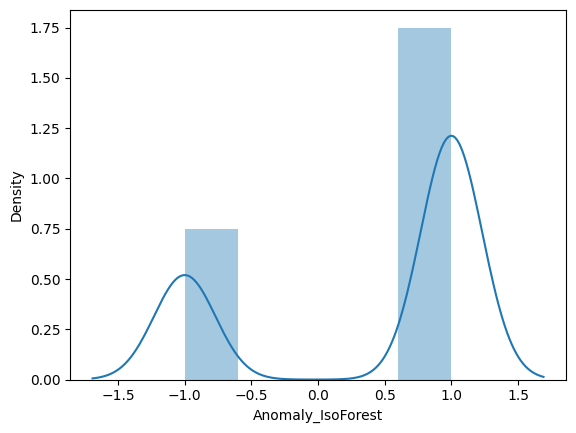

In [42]:
import seaborn as sns
sns.distplot(df1['Anomaly_IsoForest'])
df1['Anomaly_IsoForest'].skew()

# **Skew : -0.874183382765495 -> Slighly Negative Skewed - Left Tail**

/tmp/ipython-input-3523289369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Anomaly_Autoencoder'])


np.float64(4.135689330282187)

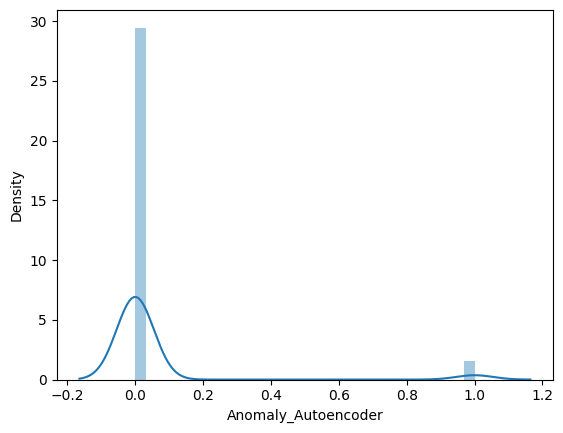

In [43]:
sns.distplot(df1['Anomaly_Autoencoder'])
df1['Anomaly_Autoencoder'].skew()

# **Skew : 4.135689330282186 Highly Posative Skewed**

# **Isolation Forest** - takes all fraud transaction

# **Autoencoder** - Take most Wanted Fraud Transaction

# **Isolation Forest:** "Catches most fraud transactions, including obvious and simple fraud. and May be Chances of False Posative  - Easy to all kinds of outliers"

# **Autoencoder:** "Catches the most sophisticated and high-risk fraud transactions (the most wanted)

In [44]:
df1.to_csv('df1_fraud-detection.csv')

# **(i) Feature Engineering**

Select Feature Columns Based on

a) Filter Method

b) Wrapper Method

# **Used Scaled Dataset:**

In [45]:
df1_scaled = pd.read_csv('/content/df1_scaled.csv')
df1_scaled.head()

,Unnamed: 0,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


# **It is used to train models for risk classification, claim prediction, and fraud detection.**

In [46]:
df1_scaled.columns.values

array(['Unnamed: 0', 'Policy_ID', 'Customer_Age', 'Annual_Income',
       'Vehicle_Age_Property_Age', 'Claim_History', 'Premium_Amount',
       'Claim_Amount', 'Fraudulent_Claim', 'Risk_Score_Encoded',
       'Policy_Type_Auto', 'Policy_Type_Health', 'Policy_Type_Life',
       'Policy_Type_Property', 'Gender_Female', 'Gender_Male',
       'Gender_Other'], dtype=object)

# **1st Prediction about Risk classification, / Risk_Score_Encoded Column**

**Risk_Score_Encoded as Target Columns**

In [47]:
feature = df1_scaled.copy()

feature = feature.drop(columns=['Unnamed: 0','Policy_ID','Risk_Score_Encoded',])

In [48]:
target = df1_scaled['Risk_Score_Encoded']

In [49]:
feature.head()

,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,58,0.741442,7,1,0.139545,0.102080,0,0,1,0,0,0,1,0
1,65,0.590267,1,0,0.093670,0.232579,0,0,1,0,0,0,0,1
2,56,0.715891,22,4,0.419729,0.449681,0,1,0,0,0,0,1,0
3,35,0.697997,10,2,0.155499,0.958985,1,1,0,0,0,0,1,0
4,39,0.379538,11,2,0.604068,0.808517,1,0,1,0,0,0,1,0


In [50]:
target.head()

,Risk_Score_Encoded
0,0
1,0
2,1
3,1
4,2


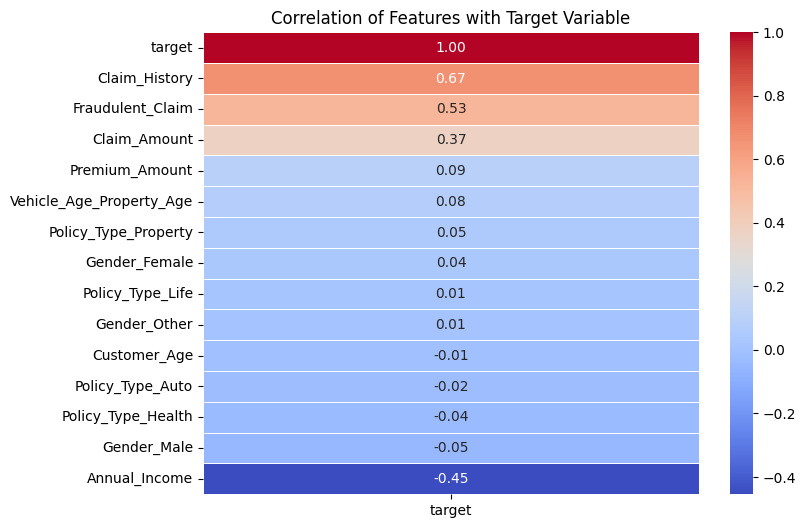

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


# **target ( Risk_Score_Encoded ) - Highly Contributed Feature Columns near to 0 is No Contributed**

# **1) Model Training**

In [52]:
x = feature
y = target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [53]:
target.value_counts()

,count
Risk_Score_Encoded,
2,340
0,330
1,330


# **target is multiclass**

In [54]:
from sklearn.ensemble import RandomForestClassifier
# 3. Initialize the model (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# **For Test prediction**

In [55]:
y_pred_test = rf_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy Score: 0.825

Confusion Matrix:
 [[56 13  0]
 [ 2 49  9]
 [ 0 11 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88        69
           1       0.67      0.82      0.74        60
           2       0.87      0.85      0.86        71

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.84      0.82      0.83       200



# **For Train Prediction**

In [56]:
y_pred_train = rf_model.predict(x_train)
print("Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy Score: 1.0

Confusion Matrix:
 [[261   0   0]
 [  0 270   0]
 [  0   0 269]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       269

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [57]:
# 7. (Optional) Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
print("\nFeature Importances:\n", feature_importances.sort_values(ascending=False))



Feature Importances:
 Annual_Income               0.233580
Claim_History               0.225815
Claim_Amount                0.148753
Fraudulent_Claim            0.087263
Premium_Amount              0.079539
Customer_Age                0.074902
Vehicle_Age_Property_Age    0.071109
Gender_Male                 0.013563
Policy_Type_Life            0.011798
Policy_Type_Property        0.011502
Policy_Type_Auto            0.011098
Gender_Female               0.010701
Gender_Other                0.010196
Policy_Type_Health          0.010182
dtype: float64


# **Random Forest Classifier Using to Train Model**

Test Set Accuracy Score: 0.82

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.73      0.71      0.72        66
           2       0.86      0.84      0.85        68

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



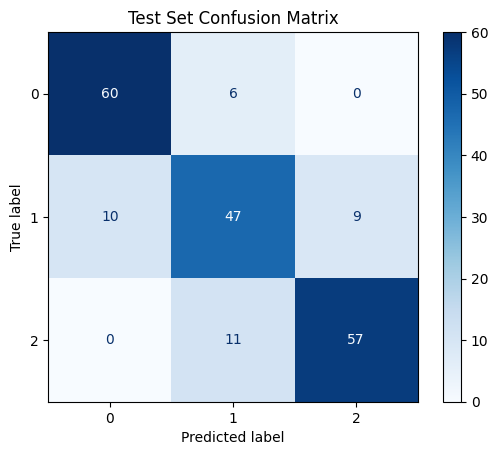


Class: 0
True Positive: 60
False Positive: 10
False Negative: 6
True Negative: 124

Class: 1
True Positive: 47
False Positive: 17
False Negative: 19
True Negative: 117

Class: 2
True Positive: 57
False Positive: 9
False Negative: 11
True Negative: 123
Class 0: High false positive rate – consider tuning the model to improve precision.
Class 1: High false negative rate – consider tuning the model to improve recall.
Class 2: High false negative rate – consider tuning the model to improve recall.
Train Set Accuracy Score: 1.0

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       272

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



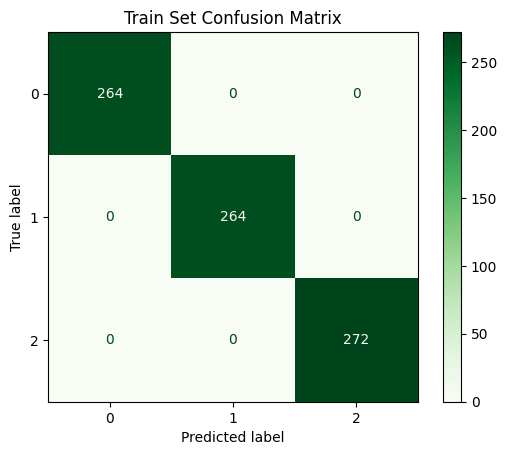

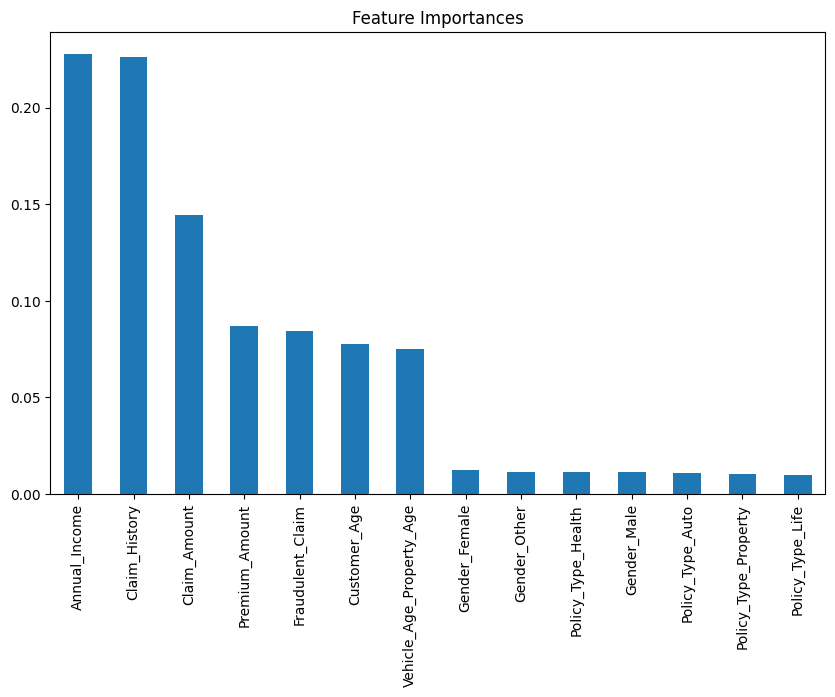

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Features and target
x = feature  # Assuming feature is a preprocessed DataFrame
y = target   # Assuming target is the target variable

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Extract per-class true positive, false positive, false negative, true negative
FP = cm_test.sum(axis=0) - np.diag(cm_test)  # False positives per class
FN = cm_test.sum(axis=1) - np.diag(cm_test)  # False negatives per class
TP = np.diag(cm_test)                       # True positives per class
TN = cm_test.sum() - (FP + FN + TP)         # True negatives per class

# Print the results
for i, class_label in enumerate(rf_model.classes_):
    print(f"\nClass: {class_label}")
    print(f"True Positive: {TP[i]}")
    print(f"False Positive: {FP[i]}")
    print(f"False Negative: {FN[i]}")
    print(f"True Negative: {TN[i]}")

# Suggestions based on confusion matrix
for i, class_label in enumerate(rf_model.classes_):
    if FP[i] > FN[i]:
        print(f"Class {class_label}: High false positive rate – consider tuning the model to improve precision.")
    elif FN[i] > FP[i]:
        print(f"Class {class_label}: High false negative rate – consider tuning the model to improve recall.")
    else:
        print(f"Class {class_label}: Balanced error rates – model performance is fairly even.")

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()

# Feature importance visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


# **Check Accuracy Status Overfit or Underfit**

In [59]:
# Determine if the model is overfitting, underfitting, or generalizing well
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Set Accuracy Score:", test_accuracy)
print("Train Set Accuracy Score:", train_accuracy)

if train_accuracy > test_accuracy + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Test Set Accuracy Score: 0.82
Train Set Accuracy Score: 1.0
Model is overfitting – it performs well on training data but poorly on test data.


# **Train Data highly Memorized the dataset that's why**

# **Check Dataset Balanced or Unbalanced**

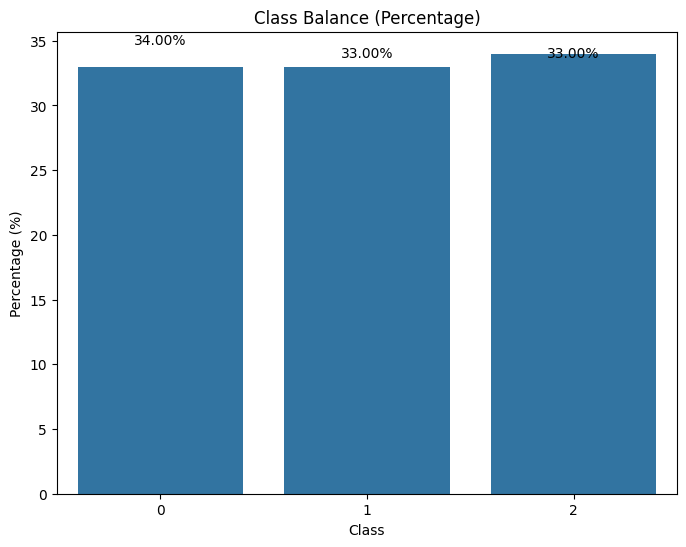

Class distribution (absolute):
 Risk_Score_Encoded
2    340
0    330
1    330
Name: count, dtype: int64
Class distribution (percentage):
 Risk_Score_Encoded
2    34.0
0    33.0
1    33.0
Name: count, dtype: float64
The dataset is fairly balanced.


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check balance of target classes
target_counts = y.value_counts()
total = len(y)

# Calculate percentages
target_percentages = (target_counts / total) * 100

# Create a barplot with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_percentages)
plt.title('Class Balance (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')

# Add percentage labels on the bars
for i, percentage in enumerate(target_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

print("Class distribution (absolute):\n", target_counts)
print("Class distribution (percentage):\n", target_percentages)

# Determine if the data is balanced or imbalanced
threshold = 0.1  # Define an acceptable imbalance ratio
max_count = target_counts.max()
min_count = target_counts.min()
imbalance_ratio = (max_count - min_count) / max_count

if imbalance_ratio > threshold:
    print("The dataset is imbalanced.")
else:
    print("The dataset is fairly balanced.")


# **The dataset is balanced**

# **2) No Smote Method is Needed Dataset Already Balanced**



# **3) now use cross validation**

# **Cross Validation using Balanced Dataset**

**x_resampled, y_resampled**

# **Using Folds 2**

Cross-validation scores: [0.828 0.844]
Mean cross-validation accuracy: 0.8360
Test Set Accuracy Score: 0.82

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.73      0.71      0.72        66
           2       0.86      0.84      0.85        68

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



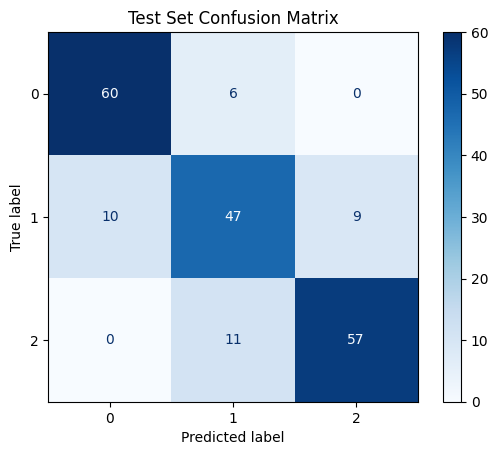


Class: 0
True Positive: 60
False Positive: 10
False Negative: 6
True Negative: 124

Class: 1
True Positive: 47
False Positive: 17
False Negative: 19
True Negative: 117

Class: 2
True Positive: 57
False Positive: 9
False Negative: 11
True Negative: 123
Class 0: High false positive rate – consider tuning the model to improve precision.
Class 1: High false negative rate – consider tuning the model to improve recall.
Class 2: High false negative rate – consider tuning the model to improve recall.
Train Set Accuracy Score: 1.0

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       272

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



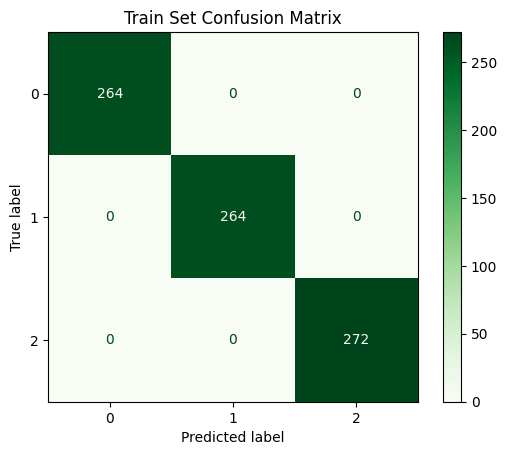

In [61]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay




# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.4f}")

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Extract per-class true positive, false positive, false negative, true negative
FP = cm_test.sum(axis=0) - np.diag(cm_test)  # False positives per class
FN = cm_test.sum(axis=1) - np.diag(cm_test)  # False negatives per class
TP = np.diag(cm_test)                       # True positives per class
TN = cm_test.sum() - (FP + FN + TP)         # True negatives per class

# Print the results
for i, class_label in enumerate(rf_model.classes_):
    print(f"\nClass: {class_label}")
    print(f"True Positive: {TP[i]}")
    print(f"False Positive: {FP[i]}")
    print(f"False Negative: {FN[i]}")
    print(f"True Negative: {TN[i]}")

# Suggestions based on confusion matrix
for i, class_label in enumerate(rf_model.classes_):
    if FP[i] > FN[i]:
        print(f"Class {class_label}: High false positive rate – consider tuning the model to improve precision.")
    elif FN[i] > FP[i]:
        print(f"Class {class_label}: High false negative rate – consider tuning the model to improve recall.")
    else:
        print(f"Class {class_label}: Balanced error rates – model performance is fairly even.")

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()


# **4) Hyper Parameter tuning**

# **Hyper Parameter Tunning user For Grid search CV using Random Forest Algorithm**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid Search CV without Stratified K-Fold
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the resampled data (assuming x_resampled and y_resampled are your balanced dataset)
grid_search.fit(x, y)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

# Train the best model on the full training set
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8520
Test Set Accuracy Score: 0.99

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.97      1.00      0.99        66
           2       1.00      0.99      0.99        68

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# **Using Best Parameters while get Hyperparameter Tunning**

Test Set Accuracy Score: 0.83

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.75      0.73      0.74        66
           2       0.87      0.87      0.87        68

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



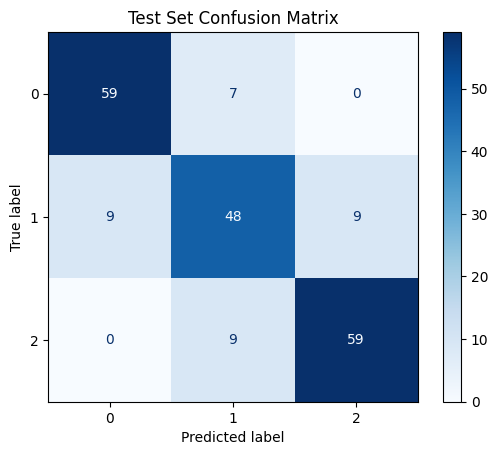

Train Set Accuracy Score: 0.995

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       264
           1       0.99      1.00      0.99       264
           2       1.00      1.00      1.00       272

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      1.00       800



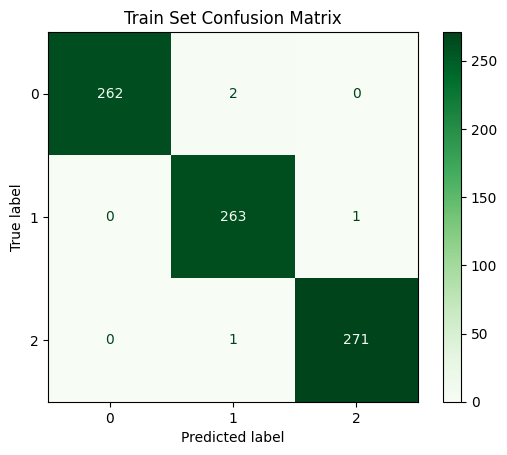

Train Accuracy: 99.50%
Test Accuracy: 83.00%
The model may be overfitting.


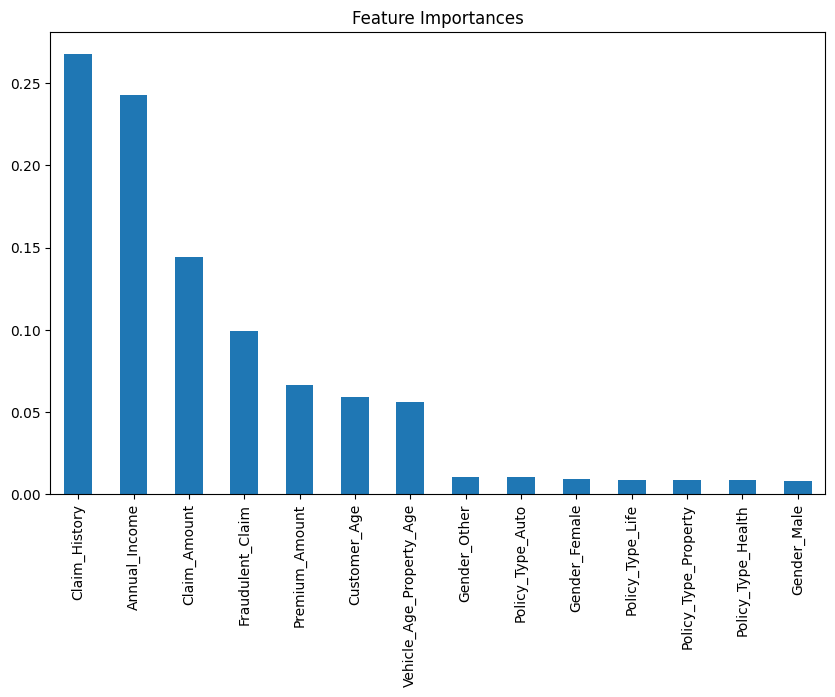

In [63]:
#Split the  data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, criterion='entropy', random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()

# Compare train and test accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.1:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Feature importance visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


In [64]:
# Determine if the model is overfitting, underfitting, or generalizing well
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Set Accuracy Score:", test_accuracy)
print("Train Set Accuracy Score:", train_accuracy)

if train_accuracy > test_accuracy + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Test Set Accuracy Score: 0.83
Train Set Accuracy Score: 0.995
Model is overfitting – it performs well on training data but poorly on test data.


# **After Hyperparamter Tuning showing Test Accuracy is 83%**

# **5) Deep Learning Neural Network**

In [65]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example: Assuming X (features) and y (target) are already defined
X = feature
y = target

# One-hot encode target for multiclass classification
y = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on train data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and get classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3506 - loss: 3.6321 - val_accuracy: 0.3050 - val_loss: 1.3364
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2970 - loss: 2.3376 - val_accuracy: 0.4450 - val_loss: 1.1027
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3763 - loss: 1.4314 - val_accuracy: 0.3500 - val_loss: 1.1000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3615 - loss: 1.3295 - val_accuracy: 0.3450 - val_loss: 1.1031
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3890 - loss: 1.1708 - val_accuracy: 0.3250 - val_loss: 1.1021
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3595 - loss: 1.1449 - val_accuracy: 0.2850 - val_loss: 1.0999
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3409 - loss: 1.1656 - val_accuracy: 0.3200 - val_loss: 1.1012
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3378 - loss: 1.1248 - val_accuracy: 0.2950 - val_loss: 1.1000
Ep

In [66]:
# Evaluate the model on train data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


print("Test Set Accuracy Score:", test_acc)
print("Train Set Accuracy Score:", train_acc)

if train_acc > test_acc + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_acc > train_acc + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Train Accuracy: 0.8050
Test Accuracy: 0.7850
Test Set Accuracy Score: 0.7850000262260437
Train Set Accuracy Score: 0.8050000071525574
Model is generalizing well – performance is balanced between training and test sets.


# **Model is generalizing well** - After deep learning

1) Increase or decrease the number of neurons or layers.

2) Tune the dropout rate to prevent overfitting.

3) Experiment with different activation functions like LeakyReLU or ELU.

4) Adjust learning rate in the Adam optimizer.

5) Try adding BatchNormalization layers.

# **Now Save the Deep Learning Model.h5**
# **hdf5 Format**

In [67]:
model.save('my_model.h5')  # Or 'my_model' for SavedModel format

In [68]:
import joblib

# Save the model in .pkl format
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

# **df1-2nd-model-training**

# **Claim Prediction:** based on Claim History - Already Claim or Not

**Give Highest preference Based on 0 Claim History**

# **Create Classification : 1 -> Already Claim Insurance 1 or More**

# **0 -> No Claims**

In [69]:
import pandas as pd
df1=pd.read_csv('/content/df1_scaled.csv')
df1.head()

,Unnamed: 0,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


In [70]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head(1)

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.10208,0,0,0,1,0,0,0,1,0


In [71]:
df1['Claim_History'].value_counts()

,count
Claim_History,
5,172
4,171
3,171
1,170
2,170
0,146


#General Condition

# **Claim There are upto 5 Claims Happens so i fix it when claim history is More than 2 means claim will be failed**

#**Overall Working Procedure**

**# filed claim write based on claim history more than 2 is filed and write policy type health more than 3 is filed**

**# and policy type more than 1 is filed and gender female means policy type health more than 4 is filed**

**# and Vehicle_Age_Property_Age	 is more than 15 is filed using**

In [72]:
import pandas as pd


# Define 'Filed_Claim' based on multiple conditions
df1['Filed_Claim'] = df1.apply(lambda row: 1 if (
    row['Claim_History'] > 2 or
    row['Policy_Type_Health'] > 3 or
    row['Policy_Type_Auto'] > 1 or
    row['Policy_Type_Life'] > 1 or
    row['Policy_Type_Property'] > 1 or
    (row['Gender_Female'] == 1 and row['Policy_Type_Health'] > 4) or
    row['Vehicle_Age_Property_Age'] > 15
) else 0, axis=1)

df1.head()

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Filed_Claim
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0,1
3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0,0


In [73]:
df1['Filed_Claim'].value_counts()

,count
Filed_Claim,
1,741
0,259


In [74]:
df1.to_csv('df1-3rd-claim-pred.csv')

# **146 Customers did't claim single time**

# **486 Customers are claim less than or equal 2 Claims**

# **so focus on claim below 2 was eligible for claims otherwise failed**

**Customer_Age** → Older or younger customers may have different claim behaviors

**Gender** → Sometimes used for risk profiling (though it depends on local regulations)

**Policy_Type** → Different policies have different likelihoods of claims (e.g., Auto vs. Life)

**Annual_Income** → Income levels can affect the likelihood of claims

**Vehicle_Age / Property_Age** → Older assets might have more claims due to wear and tear

**Claim_History** → A customer with frequent claims is likely to claim again

**Premium_Amount** → Higher premiums could indicate higher-value policies, which may correlate with higher or more frequent claims

**Risk_Score** → Pre-assessed risk category might indicate likelihood of claims

# **Input features:** Customer_Age, Gender, Policy_Type, Annual_Income, Vehicle_Age_Property_Age, Premium_Amount, Claim_History

# **Taget Column:** Filed_Claim

In [75]:
feature = df1[['Customer_Age','Policy_Type_Auto',	'Policy_Type_Health',	'Policy_Type_Life',	'Policy_Type_Property',	'Gender_Female',	'Gender_Male',	'Gender_Other','Annual_Income','Vehicle_Age_Property_Age','Premium_Amount','Claim_History']]
target = df1['Filed_Claim']

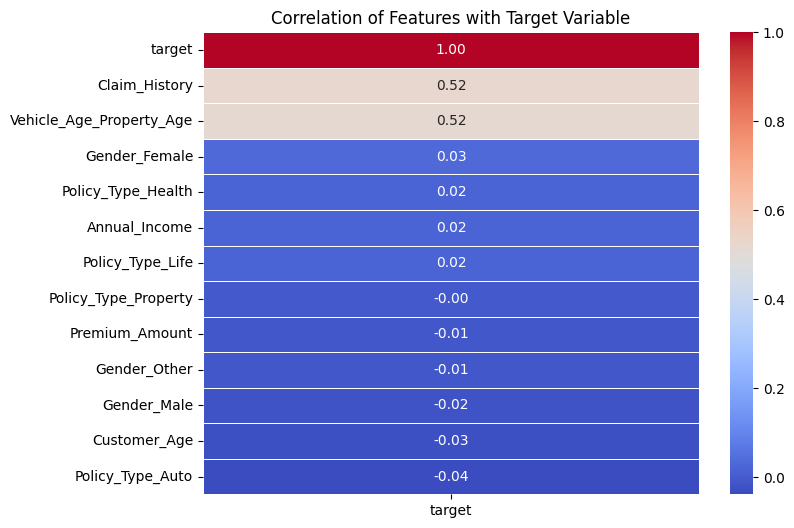

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


# **1) Model Training**

In [77]:
x = feature
y = target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [78]:
target.value_counts()

,count
Filed_Claim,
1,741
0,259


# **Target is Binary Classification Type**

In [79]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **For Test prediction**

In [80]:
y_pred_test = logis_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
Confusion Matrix:
[[ 34  10]
 [  7 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.94      0.96      0.95       156

    accuracy                           0.92       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.91      0.92      0.91       200



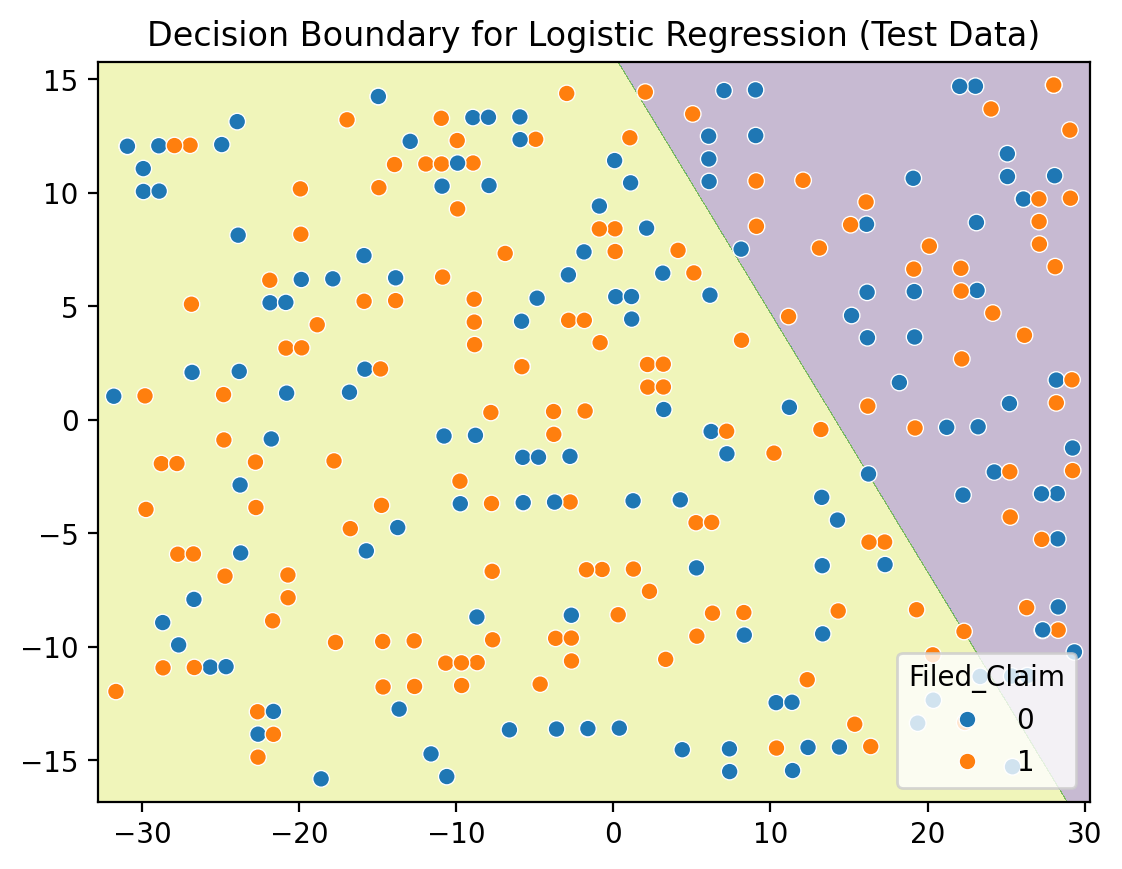

**1) 0 (blue points): No filed claim - as 2 or Below Claims are alow to next Claim**

**2) 1 (orange points): Filed claim**

**3) Each shade shows the area where the model predicts either class "0" or "1".For example, the lighter region might represent the model’s prediction for "No filed claim" (class 0) - Still 0 Claims Happens,**

**4) and the darker region for "Filed claim" (class 1).**

# **Train and Test Result Compare to Overfit or Underfit**

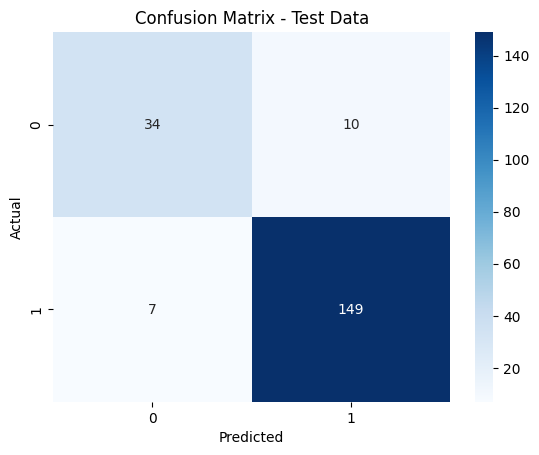

Test Data Results:
Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
True Positives (TP): 149
True Negatives (TN): 34
False Positives (FP): 10
False Negatives (FN): 7

Interpretation:
- True Positives: 149 cases where the model correctly predicted a filed claim.
- True Negatives: 34 cases where the model correctly predicted no filed claim.
- False Positives: 10 cases where the model wrongly predicted a filed claim when there was none.
- False Negatives: 7 cases where the model missed an actual filed claim.

Train Data Results:
Accuracy: 0.91625
Precision: 0.9389830508474576
Recall: 0.947008547008547
F1 Score: 0.9429787234042554

Model seems well-balanced between train and test data.


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logis_model.predict(x_test)

# Predictions for train data
y_pred_train = logis_model.predict(x_train)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted a filed claim.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no filed claim.")
print(f"- False Positives: {FP} cases where the model wrongly predicted a filed claim when there was none.")
print(f"- False Negatives: {FN} cases where the model missed an actual filed claim.")


# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Interpretation:**

- True Positives: 149 cases where the model correctly predicted a filed claim.

- True Negatives: 34 cases where the model correctly predicted no filed claim.

- False Positives: 10 cases where the model wrongly predicted a filed claim when there was none.
- False Negatives: 7 cases where the model missed an actual filed claim.

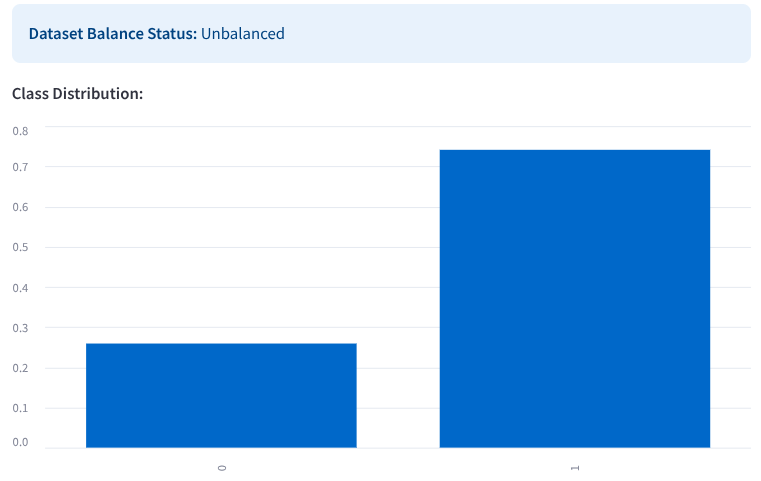

**My Dataset is Balanced**

**72:28**

# **ROC and AUC Curve**

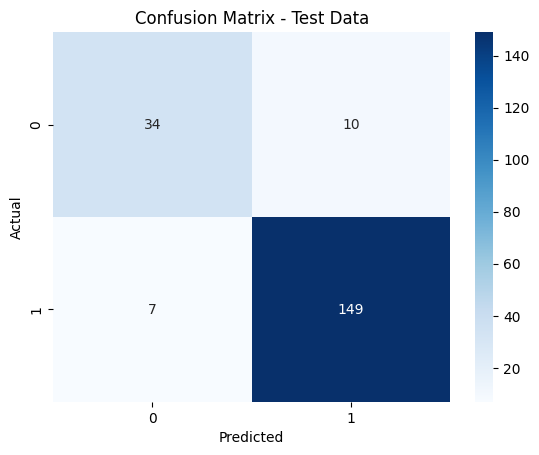

Test Data Results:
Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
True Positives (TP): 149
True Negatives (TN): 34
False Positives (FP): 10
False Negatives (FN): 7

Interpretation:
- True Positives: 149 cases where the model correctly predicted fraud.
- True Negatives: 34 cases where the model correctly predicted no fraud.
- False Positives: 10 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 7 cases where the model missed actual fraud.


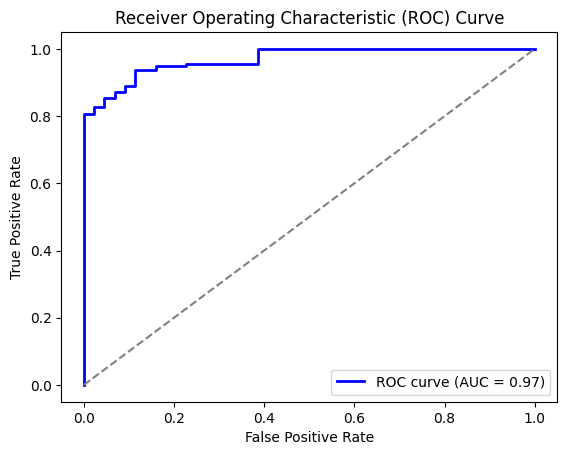


AUC (Area Under the Curve): 0.9694055944055944

Why ROC and AUC are important:
- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).
- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.
- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.

Suggested optimal threshold: 0.70
- This threshold balances sensitivity and specificity to achieve the best classification performance.

Train Data Results:
Accuracy: 0.91625
Precision: 0.9389830508474576
Recall: 0.947008547008547
F1 Score: 0.9429787234042554

Model seems well-balanced between train and test data.


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logis_model.predict(x_test)

# Predictions for train data
y_pred_train = logis_model.predict(x_train)

# Predicted probabilities for ROC curve
y_probs_test = logis_model.predict_proba(x_test)[:, 1]

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC (Area Under the Curve): {roc_auc}")

# Interpretation of ROC and AUC
print("\nWhy ROC and AUC are important:")
print("- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).")
print("- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.")
print("- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.")

# Choosing an appropriate threshold
best_threshold_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_index]
print(f"\nSuggested optimal threshold: {best_threshold:.2f}")
print("- This threshold balances sensitivity and specificity to achieve the best classification performance.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Differnce of True Posative Rate (TPR) and False Posative Rate (FPR) : TPR-FPR to find Best Optimal Threshold for this model**

**AUC (Area Under the Curve): 0.9755244755244754 is Almost near to 1: so its very Good**

# **Suggested optimal threshold: 0.84**

AUC stands for Area Under the Curve and ROC stands for Receiver Operating Characteristic.

Maximum Increase True Posative Rate from False Posative Rate

# **Cross Validation: Stratified K-folds**

**Focusing Class 0 as -> 25% and Class 1 as -> 75%**

**to extra focusing on Minority Class also**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation Results:
Average Train Accuracy: 0.92
Average Test Accuracy: 0.91
Average Precision: 0.93
Average Recall: 0.94
Average F1 Score: 0.94
Average AUC: 0.97


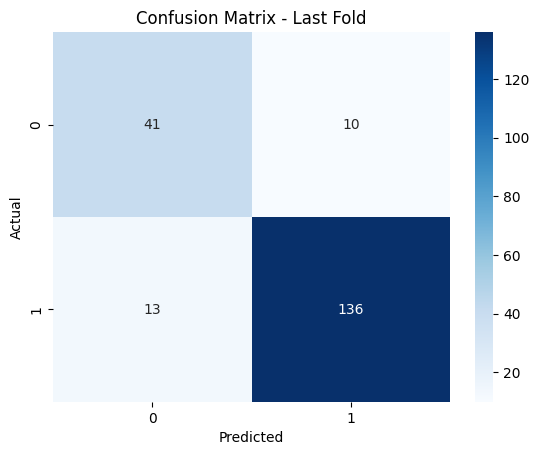

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Stratified K-Fold setup with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder metrics
accuracies, precisions, recalls, f1_scores, aucs = [], [], [], [], []
train_accuracies = []

# Class distribution focus: 25% class 0, 75% class 1
class_distribution = {0: 0.25, 1: 0.75}

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    logis_model.fit(x_train, y_train)

    # Predictions
    y_pred_train = logis_model.predict(x_train)
    y_pred_test = logis_model.predict(x_test)
    y_probs_test = logis_model.predict_proba(x_test)[:, 1]

    # Calculate metrics
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    accuracies.append(accuracy_score(y_test, y_pred_test))
    precisions.append(precision_score(y_test, y_pred_test))
    recalls.append(recall_score(y_test, y_pred_test))
    f1_scores.append(f1_score(y_test, y_pred_test))

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
    aucs.append(auc(fpr, tpr))

# Average metrics
print("\nCross-Validation Results:")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.2f}")
print(f"Average Test Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f}")
print(f"Average AUC: {np.mean(aucs):.2f}")

# Visualize the last confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Last Fold')
plt.show()


# Class distribution focus: 25% class 0, 75% class 1

**class_distribution = {0: 0.25, 1: 0.75}**

In [84]:
import joblib
# Fit model
logis_model.fit(x_train, y_train)

    # Save model
joblib.dump(logis_model, 'logistic_regression_model.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

# **df1-3rd-model-training**

# **Fraud Detection**

In [85]:
import pandas as pd
df1=pd.read_csv('/content/df1_scaled.csv')
df1.head()

,Unnamed: 0,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.102080,0,0,0,1,0,0,0,1,0
1,1,23b8c1e9-3924-46de-beb1-3b9046685257,65,0.590267,1,0,0.093670,0.232579,0,0,0,1,0,0,0,0,1
2,2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,56,0.715891,22,4,0.419729,0.449681,0,1,1,0,0,0,0,1,0
3,3,972a8469-1641-4f82-8b9d-2434e465e150,35,0.697997,10,2,0.155499,0.958985,1,1,1,0,0,0,0,1,0
4,4,17fc695a-07a0-4a6e-8822-e8f36c031199,39,0.379538,11,2,0.604068,0.808517,1,2,0,1,0,0,0,1,0


In [86]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head(1)

,Policy_ID,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Fraudulent_Claim,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,58,0.741442,7,1,0.139545,0.10208,0,0,0,1,0,0,0,1,0


In [87]:
feature = df1.copy()

feature = feature.drop(columns=['Policy_ID','Fraudulent_Claim'])
target = df1['Fraudulent_Claim']
feature.head()

,Customer_Age,Annual_Income,Vehicle_Age_Property_Age,Claim_History,Premium_Amount,Claim_Amount,Risk_Score_Encoded,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,58,0.741442,7,1,0.139545,0.102080,0,0,1,0,0,0,1,0
1,65,0.590267,1,0,0.093670,0.232579,0,0,1,0,0,0,0,1
2,56,0.715891,22,4,0.419729,0.449681,1,1,0,0,0,0,1,0
3,35,0.697997,10,2,0.155499,0.958985,1,1,0,0,0,0,1,0
4,39,0.379538,11,2,0.604068,0.808517,2,0,1,0,0,0,1,0


In [88]:
target.head()

,Fraudulent_Claim
0,0
1,0
2,0
3,1
4,1


# **Select Feature Using Filter Method**

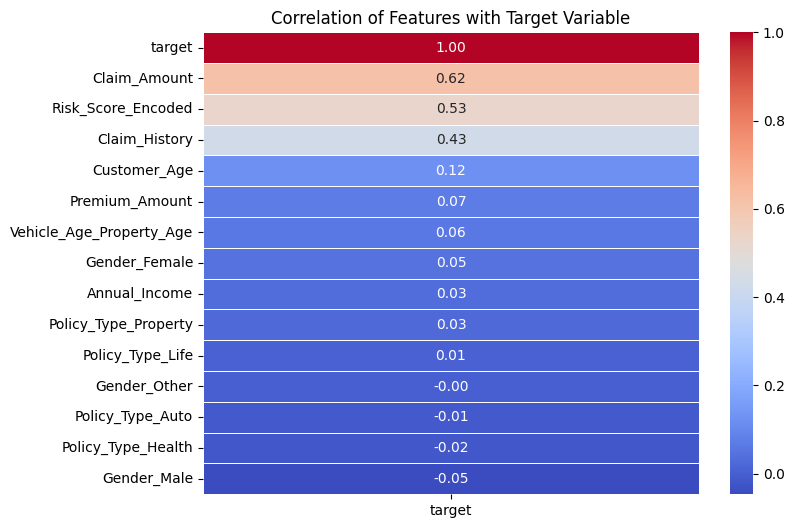

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


# **Select Highly Contributed Columns for feature using RFE -Recursive Feature Elimination (RFE) (Wrapper Method)**

# **can apply RFE with Random Forest Regressor:**

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/content/df1_scaled.csv')

# Separate features and target
X = df.drop(columns=['Unnamed: 0','Policy_ID','Fraudulent_Claim'])  # Replace with your actual target column name
y = df['Fraudulent_Claim']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Optional: Check feature ranking
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
print(feature_ranking.sort_values(by='Ranking'))


Selected Features: Index(['Customer_Age', 'Annual_Income', 'Vehicle_Age_Property_Age',
       'Claim_History', 'Premium_Amount', 'Claim_Amount', 'Risk_Score_Encoded',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')
                     Feature  Ranking
0               Customer_Age        1
1              Annual_Income        1
2   Vehicle_Age_Property_Age        1
3              Claim_History        1
4             Premium_Amount        1
5               Claim_Amount        1
6         Risk_Score_Encoded        1
11             Gender_Female        1
13              Gender_Other        1
12               Gender_Male        1
8         Policy_Type_Health        2
9           Policy_Type_Life        3
10      Policy_Type_Property        4
7           Policy_Type_Auto        5


took Features for Model Training

**Vehicle_Age_Property_Age, Premium_Amount, Claim_Amount**

In [91]:
feature = df1[['Vehicle_Age_Property_Age','Premium_Amount','Claim_Amount','Claim_History']]
target = df1['Fraudulent_Claim']

# **1) Model Training**

In [92]:
x = feature
y = target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [93]:
target.value_counts()

,count
Fraudulent_Claim,
0,700
1,300


# **Target is Binary Classification Type**

In [94]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(x_train,y_train)

LogisticRegression()

# **For Test prediction**

In [95]:
y_pred_test = logi_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
Confusion Matrix:
[[138   4]
 [  8  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       142
           1       0.93      0.86      0.89        58

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200



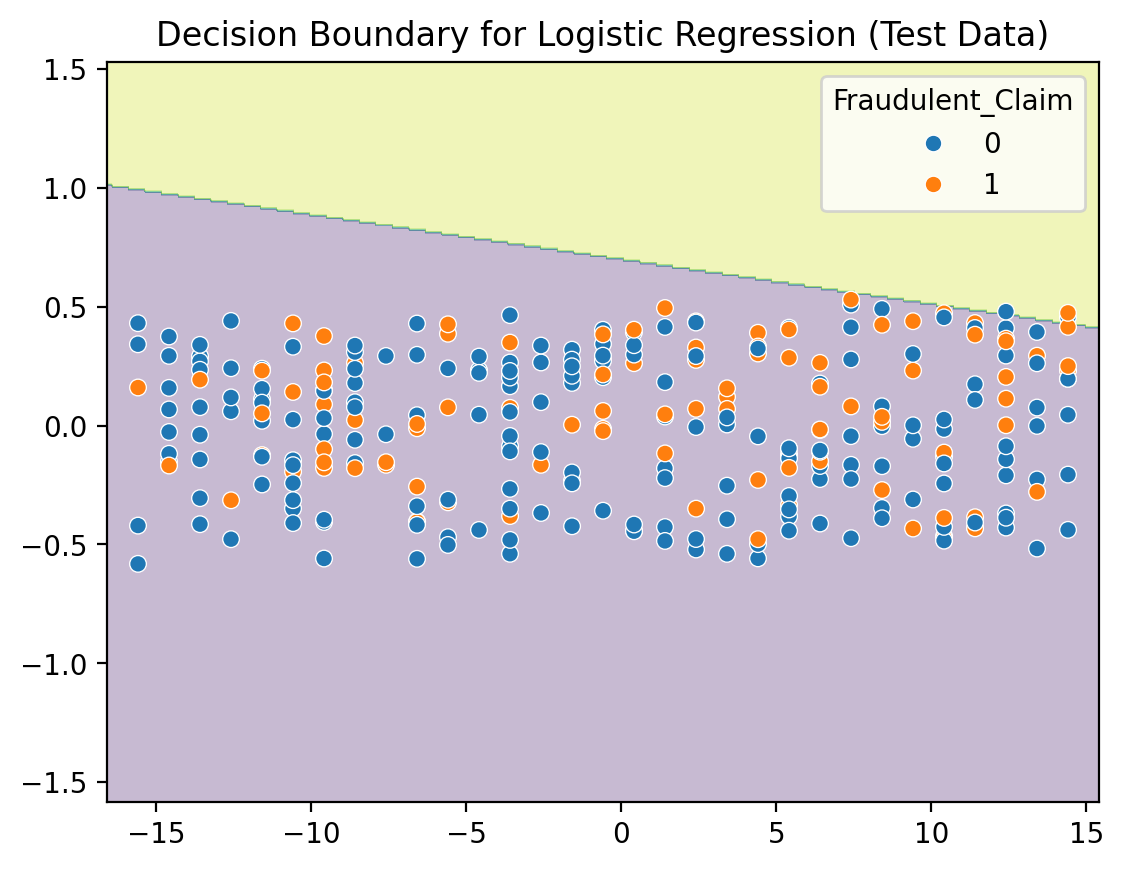

# **Train and Test Result Compare to Overfit or Underfit**

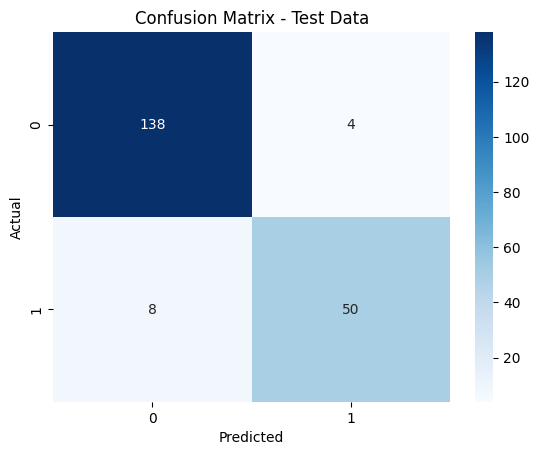

Test Data Results:
Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
True Positives (TP): 50
True Negatives (TN): 138
False Positives (FP): 4
False Negatives (FN): 8

Interpretation:
- True Positives: 50 cases where the model correctly predicted fraud.
- True Negatives: 138 cases where the model correctly predicted no fraud.
- False Positives: 4 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 8 cases where the model missed actual fraud.

Train Data Results:
Accuracy: 0.93625
Precision: 0.920704845814978
Recall: 0.8636363636363636
F1 Score: 0.8912579957356077

Model seems well-balanced between train and test data.


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logi_model.predict(x_test)

# Predictions for train data
y_pred_train = logi_model.predict(x_train)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


True Positives (TP): 50,

True Negatives (TN): 138,

False Positives (FP): 4,

False Negatives (FN): 8

# **Interpretation:**

- True Positives: 50 cases where the model correctly predicted fraud.

- True Negatives: 138 cases where the model correctly predicted no fraud.

- False Positives: 4 cases where the model wrongly predicted fraud when there was none.

- False Negatives: 8 cases where the model missed actual fraud.

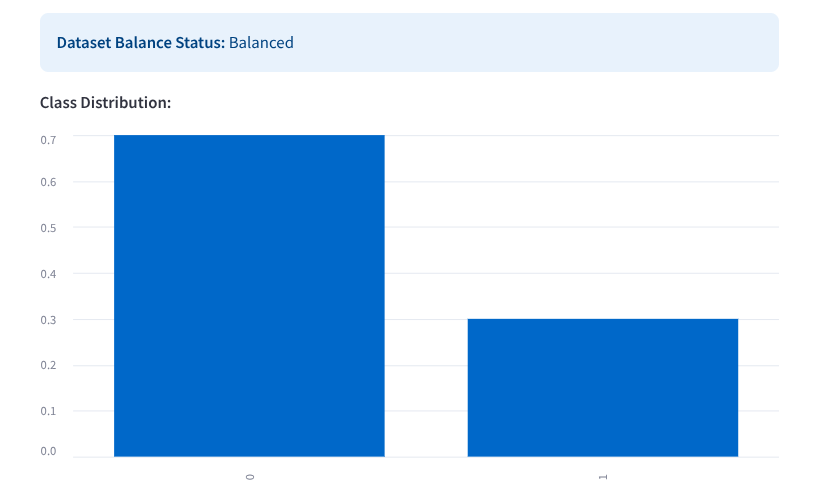

# **Dataset is Balanced**

**70:30**

# **ROC and AUC Curve**

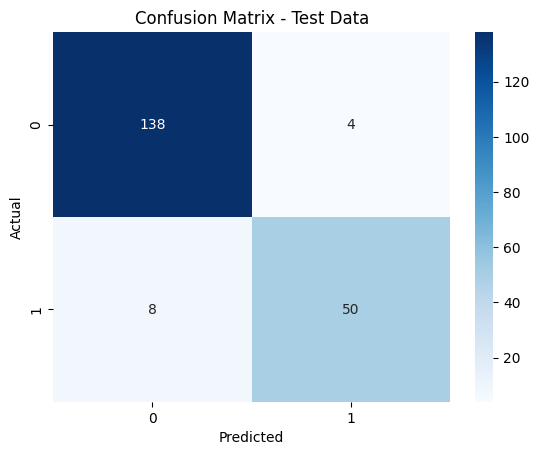

Test Data Results:
Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
True Positives (TP): 50
True Negatives (TN): 138
False Positives (FP): 4
False Negatives (FN): 8

Interpretation:
- True Positives: 50 cases where the model correctly predicted fraud.
- True Negatives: 138 cases where the model correctly predicted no fraud.
- False Positives: 4 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 8 cases where the model missed actual fraud.


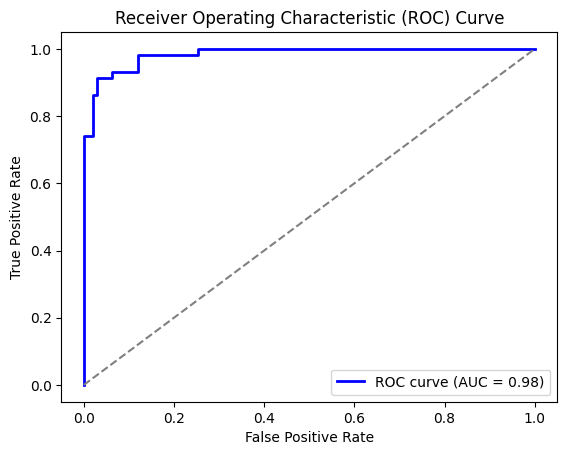


AUC (Area Under the Curve): 0.9843370568237009

Why ROC and AUC are important:
- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).
- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.
- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.

Suggested optimal threshold: 0.49
- This threshold balances sensitivity and specificity to achieve the best classification performance.

Train Data Results:
Accuracy: 0.93625
Precision: 0.920704845814978
Recall: 0.8636363636363636
F1 Score: 0.8912579957356077

Model seems well-balanced between train and test data.


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logi_model.predict(x_test)

# Predictions for train data
y_pred_train = logi_model.predict(x_train)

# Predicted probabilities for ROC curve
y_probs_test = logi_model.predict_proba(x_test)[:, 1]

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC (Area Under the Curve): {roc_auc}")

# Interpretation of ROC and AUC
print("\nWhy ROC and AUC are important:")
print("- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).")
print("- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.")
print("- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.")

# Choosing an appropriate threshold
best_threshold_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_index]
print(f"\nSuggested optimal threshold: {best_threshold:.2f}")
print("- This threshold balances sensitivity and specificity to achieve the best classification performance.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Differnce of True Posative Rate (TPR) and False Posative Rate (FPR) : TPR-FPR to find Best Optimal Threshold for this model**

**AUC (Area Under the Curve): 0.9843370568237009 is Almost near to 1: so its very Good**



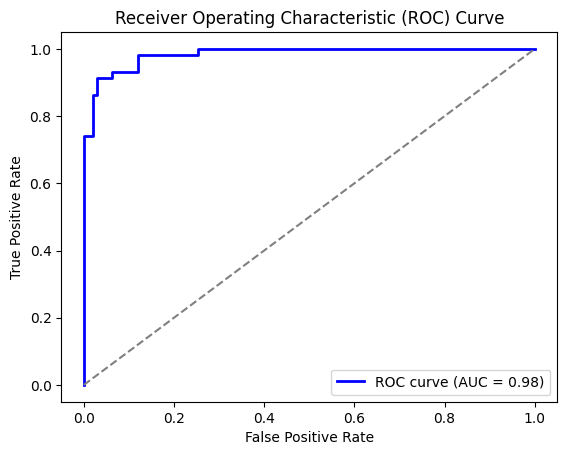

AUC (Area Under the Curve): 0.9843370568237009

Recommendation: Excellent model performance. Consider tuning threshold for slight improvements.


In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for ROC curve
y_probs_test = logi_model.predict_proba(x_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc}")

# Option to change threshold
def evaluate_threshold(threshold):
    y_pred_custom = (y_probs_test >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_custom)
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"\nThreshold: {threshold}")
    print(f"True Positives: {TP}")
    print(f"True Negatives: {TN}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")

# Recommendation based on AUC
if roc_auc >= 0.9:
    print("\nRecommendation: Excellent model performance. Consider tuning threshold for slight improvements.")
elif 0.8 <= roc_auc < 0.9:
    print("\nRecommendation: Good model performance. Fine-tune the threshold to balance sensitivity and specificity.")
elif 0.7 <= roc_auc < 0.8:
    print("\nRecommendation: Acceptable performance. Consider further feature engineering and threshold adjustment.")
else:
    print("\nRecommendation: Poor model performance. Revisit data preprocessing, feature selection, or model choice.")


**AUC stands for Area Under the Curve and ROC stands for Receiver Operating Characteristic.**

ROC Curve: It’s a graph showing the performance of a classification model at all possible classification thresholds. **It plots the True Positive Rate (Sensitivity) against the False Positive Rate** (1 - Specificity).

AUC: This measures the area under the ROC curve — a single value that summarizes the model’s ability to distinguish between classes. **AUC closer to 1 indicates a better-performing model, while 0.5 suggests no better performance than random guessing.**


# **Statement: My Point of View**

# is AUC and ROC Curve focus maximum increasing a true posative value from false posative

# eg: to get avoid little bit fraud person to get more customer bank.

**The goal is usually to avoid too many false positives while still catching enough fraud — like you said, so the bank avoids falsely rejecting too many good customers while still identifying fraud**

# **Save this Model:**

In [99]:
import joblib

# Save the model to a file
joblib.dump(logi_model, 'logi_model.pkl')

print("Model saved successfully!")


Model saved successfully!
